<div style="text-align: center; background-color: #559cff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  LAZADA - ELECTRONICS ANALYSIS
</div>

## 1. Import neccessary libraries

In [1]:
import requests
import time
import random
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from selenium import webdriver

from selenium.webdriver.chrome.service import Service

from selenium.webdriver.common.by import By

import time


## 2. Scarping from website

In [10]:
headers = {
    "Referer" : "https://www.lazada.vn/",
    "User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/128.0.0.0 Safari/537.360",
    "Accept" : "application/json, text/plain, */*",
    "Accept-Language": "en-US,en;q=0.9",
}

params = {
    "ajax": "true",
    "isFirstRequest": "true",
    "page": "1",
    "spm": "a2o4n.searchlistcategory.cate_1.3.219424eakD5tdr"
}
categories = ["laptop", "dien-thoai-di-dong", "may-tinh-de-ban-va-phu-kien", "may-tinh-bang"]
items = []
for category in categories:
    for i in range(1, 6):
        params["page"] = i
        response = requests.get("https://www.lazada.vn/" + category, headers=headers, params=params)
        if response.status_code == 200:
            print('Request success', {category})
            list_items = response.json().get('mods').get('listItems')

            if list_items:
                for item in list_items:
                    item['category'] = category
                items.extend(list_items)

        # items.append()
df = pd.DataFrame(items)
df.to_csv('data/raw_data.csv')



Request success {'laptop'}
Request success {'laptop'}
Request success {'laptop'}
Request success {'laptop'}
Request success {'laptop'}
Request success {'dien-thoai-di-dong'}
Request success {'dien-thoai-di-dong'}
Request success {'dien-thoai-di-dong'}
Request success {'dien-thoai-di-dong'}
Request success {'dien-thoai-di-dong'}
Request success {'may-tinh-de-ban-va-phu-kien'}
Request success {'may-tinh-de-ban-va-phu-kien'}
Request success {'may-tinh-de-ban-va-phu-kien'}
Request success {'may-tinh-de-ban-va-phu-kien'}
Request success {'may-tinh-de-ban-va-phu-kien'}
Request success {'may-tinh-bang'}
Request success {'may-tinh-bang'}
Request success {'may-tinh-bang'}
Request success {'may-tinh-bang'}
Request success {'may-tinh-bang'}


## 3. Exploring Data

In [2]:
raw_df = pd.read_csv("data/raw_data.csv")

### How many rows and columns are there?

In [3]:
shape = raw_df.shape
print(f"The data has {shape[0]} rows and {shape[1]} columns.")

The data has 800 rows and 50 columns.


### Are there any duplicated rows?

In [5]:
index = raw_df.index
detectDupSeries = index.duplicated(keep='first')
num_duplicated_rows = detectDupSeries.sum()

if num_duplicated_rows == 0:
    print(f"Data have no duplicated line.!")
else:
    if num_duplicated_rows > 1:
        ext = "lines"
    else:
        ext = "line"
    print(f"Data have {num_duplicated_rows} duplicated " + ext + ". Please de-deduplicate your raw data.!")

Data have no duplicated line.!


### What is the current data type of each column?

In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            800 non-null    int64  
 1   name                  800 non-null    object 
 2   nid                   800 non-null    int64  
 3   itemId                800 non-null    int64  
 4   icons                 800 non-null    object 
 5   image                 800 non-null    object 
 6   isSmartImage          800 non-null    bool   
 7   originalPriceShow     0 non-null      float64
 8   priceShow             800 non-null    object 
 9   ratingScore           377 non-null    float64
 10  review                383 non-null    float64
 11  location              800 non-null    object 
 12  thumbs                800 non-null    object 
 13  sellerName            800 non-null    object 
 14  sellerId              800 non-null    int64  
 15  brandName             7

### With each numerical column, how are values distributed?

In [7]:
num_col_info_df = raw_df.select_dtypes(exclude='object')
def missing_ratio(s):
    return (s.isna().mean() * 100).round(1)


num_col_info_df = num_col_info_df.agg([missing_ratio, "min", "max"])
num_col_info_df

,Unnamed: 0,nid,itemId,isSmartImage,originalPriceShow,ratingScore,review,sellerId,brandId,skuId,...,adFlag,gridTitleLine,isFission,isBadgeAutoScroll,showCart,pCluster,pSpu,pCspu,pShadowProd,pShadowSku
missing_ratio,0.0,0.000000e+00,0.000000e+00,0.0,100.0,52.9,52.1,0.000000e+00,0.0,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,9.910000e+01,97.8,97.8,9.780000e+01,9.780000e+01
min,0.0,1.904023e+08,1.904023e+08,False,NaN,1.0,0.0,1.319900e+04,0.0,2.680757e+08,...,0.0,2.0,0.0,False,False,1.000127e+12,140314.0,140323.0,2.616190e+09,1.275772e+10
max,799.0,2.784864e+09,2.784864e+09,False,NaN,5.0,3984.0,2.007584e+11,127256803.0,1.366391e+10,...,0.0,2.0,0.0,False,False,6.000000e+12,246277.0,250347.0,2.749339e+09,1.347120e+10


### With each categorical columns, how are values distributed?

In [8]:
cate_col_info_df = raw_df.select_dtypes(include='object')
cate_col_info_df = cate_col_info_df.agg([missing_ratio])
cate_col_info_df

,name,icons,image,priceShow,location,thumbs,sellerName,brandName,cheapest_sku,sku,...,skus,tItemType,directSimilarUrl,itemUrl,querystring,category,itemSoldCntShow,pClusterType,showFeedBack,recommendTips
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,56.8,96.9,50.0,99.5


## 4. Data preprocessing

There are 50 columns in the dataframe, so I'm gonna choose some essential columns to visualize.

In [4]:
selected_columns = ["itemId", "name", "ratingScore", "review", 'location', "sellerName", "sellerId", "brandName", "price", "inStock", "originalPrice", "isSponsored", "category", "itemSoldCntShow", "itemUrl"]

df = raw_df[selected_columns]
df.to_csv("data.csv")
df.head(10)

,itemId,name,ratingScore,review,location,sellerName,sellerId,brandName,price,inStock,originalPrice,isSponsored,category,itemSoldCntShow,itemUrl
0,2608330151,Laptop Gigabyte G5 ME-51VN263SH (i5-12500H) (Đ...,5.000000,1.0,Hồ Chí Minh,PHONG VU Official Store,200165709073,Gigabyte,16650000,True,27090000.0,False,laptop,NaN,//www.lazada.vn/products/laptop-gigabyte-g5-me...
1,2453162456,Dell Latitude 7410 Core i7-10610U Ram 16Gb Ssd...,NaN,NaN,Vietnam,Laptopone,200161446384,No Brand,9500000,True,13500000.0,False,laptop,NaN,//www.lazada.vn/products/dell-latitude-7410-co...
2,2534061131,Laptop Lenovo IdeaPad Slim 5 14IAH8 - 83BF002N...,NaN,NaN,Vietnam,PHONG VU Official Store,200165709073,Lenovo,15090000,True,16489000.0,False,laptop,NaN,//www.lazada.vn/products/laptop-lenovo-ideapad...
3,1940741900,MacBook Air M2 2022 - Hàng Chính Hãng,4.730769,26.0,Vietnam,Apple Flagship Store,1000001033,Apple,23290000,True,32990000.0,False,laptop,253 sold,//www.lazada.vn/products/macbook-air-m2-2022-h...
4,2659315108,Laptop HP Gaming VICTUS 15 fb1022AX R5 7535HS/...,NaN,NaN,Vietnam,thegioididongofficial,200169255095,HP,18490000,True,25490000.0,False,laptop,NaN,//www.lazada.vn/products/laptop-hp-gaming-vict...
5,2627516690,Laptop ASUS TUF Gaming A15 FA506NC-HN031W (Ryz...,NaN,NaN,Vietnam,PHONG VU Official Store,200165709073,ASUS,19090000,True,23490000.0,False,laptop,NaN,//www.lazada.vn/products/laptop-asus-tuf-gamin...
6,1040858590,MacBook Air 2020 13.3 inches M1- Hàng Chính Hãng,4.760933,686.0,Vietnam,Apple Flagship Store,1000001033,Apple,18690000,True,28990000.0,False,laptop,3.0K sold,//www.lazada.vn/products/macbook-air-2020-133-...
7,2394117400,Máy tính xách tay/ Laptop HP Probook 450 G9 (6...,NaN,NaN,Vietnam,PHONG VU Official Store,200165709073,HP,23690000,True,26990000.0,False,laptop,NaN,//www.lazada.vn/products/may-tinh-xach-tay-lap...
8,2745180576,Lenovo Thinkpad T480 Core i5 8250U bền bỉ mạnh...,NaN,NaN,Vietnam,GIA LONG Computer,1000210056,Lenovo ThinkPad,5400000,True,NaN,False,laptop,NaN,//www.lazada.vn/products/lenovo-thinkpad-t480-...
9,2413437058,Máy Chơi Game ASUS ROG Ally RC71L Ryzen Z1 Ext...,NaN,NaN,Vietnam,PHONG VU Official Store,200165709073,ASUS,15650000,True,17990000.0,False,laptop,5 sold,//www.lazada.vn/products/may-choi-game-asus-ro...


Su dung url trong cot itemUrl de lay ra comment, sau do dung API Gemini de phan loai cac comment

## 5. Data Exploration

In [4]:
df = pd.read_csv("data/data.csv")

### 1. What is the price distribution for each category?

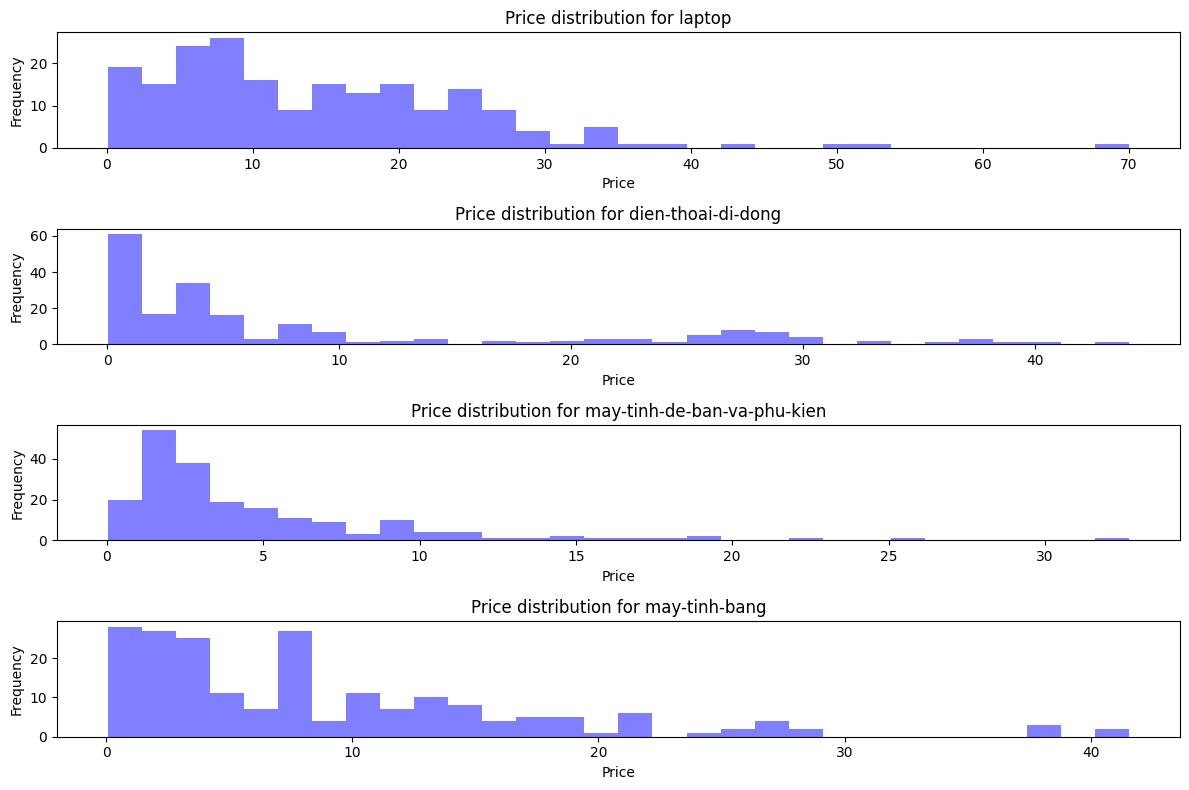

In [6]:
categories = df["category"].unique()

plt.figure(figsize=(12, 8))

for i, category in enumerate(categories, 1):
    plt.subplot(len(categories), 1, i)
    filer_data = df[df["category"] == category]
    plt.hist(filer_data["price"]/1000000, bins=30, alpha=0.5, color='b')
    plt.xlabel("Price")
    plt.ylabel("Frequency")
    plt.title(f"Price distribution for {category}")

plt.tight_layout()
plt.show()

### 2. For each category, what is top 5 most expensive products?

In [10]:
top_5 = {}
for category in categories:
    top_5[category] = []
    cate_df = df[df["category"] == "laptop"].sort_values(by="price", ascending=False).head(5)
    top_5[category].append(cate_df["name"])

top_5

{'laptop': [37     Dell Alienware M18 R1 (2023) Core™ i9-13900HX,...
  47     MacBook Pro 14 inch M3 Pro 2023 (18GB RAM| 14 ...
  32     Laptop HP Spectre x360 2-in-1 14-ef2062TU 8F5T...
  127    Laptop Colorful AT i7 11800H/ 3060 6G DDR6/ 16...
  71     Lenovo Legion Pro 5i 16" LCD Gaming Laptop WQX...
  Name: name, dtype: object],
 'dien-thoai-di-dong': [37     Dell Alienware M18 R1 (2023) Core™ i9-13900HX,...
  47     MacBook Pro 14 inch M3 Pro 2023 (18GB RAM| 14 ...
  32     Laptop HP Spectre x360 2-in-1 14-ef2062TU 8F5T...
  127    Laptop Colorful AT i7 11800H/ 3060 6G DDR6/ 16...
  71     Lenovo Legion Pro 5i 16" LCD Gaming Laptop WQX...
  Name: name, dtype: object],
 'may-tinh-de-ban-va-phu-kien': [37     Dell Alienware M18 R1 (2023) Core™ i9-13900HX,...
  47     MacBook Pro 14 inch M3 Pro 2023 (18GB RAM| 14 ...
  32     Laptop HP Spectre x360 2-in-1 14-ef2062TU 8F5T...
  127    Laptop Colorful AT i7 11800H/ 3060 6G DDR6/ 16...
  71     Lenovo Legion Pro 5i 16" LCD Gaming Laptop

## 6. Get comments for product

In [12]:
product_links = df['itemUrl']
driver = webdriver.Chrome()

driver.get("https:" + product_links[3])

In [15]:
# x = driver.find_elements(By.CSS_SELECTOR, ".content")
# name_comment = [elem.text for elem in x]
# name_comment
# product_links = df['itemUrl']
# product_names = df['name']
# product_comments = {}

# for name in product_names:
#     product_comments[name] = []

# driver = webdriver.Chrome()
# for i in range(0, 6):
#     driver.get("https:" + product_links[3])
content = driver.find_elements(By.CSS_SELECTOR, ".content")
product_comments = [comment.text for comment in content[1:]]
driver.quit()
# time.sleep(10)
product_comments
# print(x)
# driver.quit()

MaxRetryError: HTTPConnectionPool(host='localhost', port=56163): Max retries exceeded with url: /session/044109921fc32c7b7d7057a902d60a9b/url (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001AE6CEEC320>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))